# Digital Image Processing
# Spring 2025

---

# Partners
### Muhammad Abdullah Butt - 22i-0591
### Muhammad Zain Ali - 22i-0562
### Abdullah - 22i-0478
### Abdul Haadi - 22i-0592

---

# Making Foundation

In [4]:
# Importing necessary Libraries

# Data handling
import numpy as np             # Numerical operations
import pandas as pd            # CSV/dataframe handling

# Image processing
import cv2                     # OpenCV for image processing

# File system and operations
import os                      # Directory/file path handling
import shutil                  # File operations
import random                  # For random selections if needed

# Plotting and visualization
import matplotlib.pyplot as plt# For plotting images and confusion matrix

# Utilities
from collections import defaultdict  # For structured data counting

# Project Requirements
## Class Selection
---

## Train Folder Cleaning

In [6]:
train_root = 'Train'
images_per_class = 100
priority_keyword = '29'
priority_count = int(0.07 * images_per_class)
random_count = images_per_class - priority_count

for class_id in range(7):
    folder_path = os.path.join(train_root, str(class_id))
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.png')]

    priority_images = [img for img in all_images if img[:-4].endswith(priority_keyword)]
    if len(priority_images) < priority_count:
        print(f"⚠️ Not enough '29' images in class {class_id} (found {len(priority_images)}). Skipping...")
        continue

    selected_priority = random.sample(priority_images, priority_count)

    remaining_images = list(set(all_images) - set(selected_priority))
    if len(remaining_images) < random_count:
        print(f"⚠️ Not enough remaining images in class {class_id} to complete 100. Skipping...")
        continue

    selected_random = random.sample(remaining_images, random_count)

    final_selection = set(selected_priority + selected_random)

    deleted = 0
    for img in all_images:
        if img not in final_selection:
            os.remove(os.path.join(folder_path, img))
            deleted += 1

    print(f"✅ Class {class_id}: kept 100 images, deleted {deleted}")
    
print("🎯 Done! Each class folder now contains exactly 100 images (7% with '29').")

✅ Class 0: kept 100 images, deleted 0
✅ Class 1: kept 100 images, deleted 0
✅ Class 2: kept 100 images, deleted 0
✅ Class 3: kept 100 images, deleted 0
✅ Class 4: kept 100 images, deleted 0
✅ Class 5: kept 100 images, deleted 0
✅ Class 6: kept 100 images, deleted 0
🎯 Done! Each class folder now contains exactly 100 images (7% with '29').


In [3]:
df = pd.read_csv('Train_Cleaned.csv')
def path_exists(path):
    return os.path.exists(path)

df['Exists'] = df['Path'].apply(path_exists)
cleaned_df = df[df['Exists'] == True].drop(columns=['Exists'])

cleaned_df.to_csv('Train_Cleaned1.csv', index=False)
print("\n✅ Cleaned dataset saved as 'train_cleaned1.csv'")

print("Cleaned Dataset:")
cleaned_df.head()


✅ Cleaned dataset saved as 'train_cleaned1.csv'
Cleaned Dataset:


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,29,30,5,6,24,25,0,Train/0/00000_00000_00000.png
1,30,30,5,5,25,25,0,Train/0/00000_00000_00001.png
2,30,30,5,5,25,25,0,Train/0/00000_00000_00002.png
6,33,34,6,6,28,28,0,Train/0/00000_00000_00006.png
7,34,35,6,6,29,30,0,Train/0/00000_00000_00007.png


## Test Folder Cleaning

In [12]:
df = pd.read_csv('Test.csv')
df_cleaned = df[df['ClassId'] < 7]
df_cleaned.to_csv('Test_Cleaned.csv', index=False)
print("✅ Cleaned CSV saved as 'Test_cleaned.csv'")

valid_paths = set(os.path.normpath(path) for path in df_cleaned['Path'].astype(str))
image_folder = 'Test'
deleted_files = 0

for file in os.listdir(image_folder):
    full_path = os.path.normpath(os.path.join(image_folder, file))
    if full_path not in valid_paths:
        os.remove(full_path)
        deleted_files += 1

print(f"🧹 Removed {deleted_files} image(s) from the 'Test' folder not listed in the cleaned CSV.")

✅ Cleaned CSV saved as 'Test_cleaned.csv'
🧹 Removed 450 image(s) from the 'Test' folder not listed in the cleaned CSV.


---

In [2]:
# Load the CSV
df = pd.read_csv("Test_Cleaned.csv")

# Keep only ClassId from 0 to 6
df = df[df['ClassId'].isin(range(7))]

# Select 10 images per class
df_filtered = df.groupby('ClassId').head(10).reset_index(drop=True)

# Get the list of relative paths to keep (e.g., 'Test/img123.jpg')
paths_to_keep = set(df_filtered['Path'].tolist())

# Delete any files in the Test folder that are NOT in the keep list
test_folder = "Test"
for filename in os.listdir(test_folder):
    full_path = os.path.join(test_folder, filename)
    relative_path = os.path.join(test_folder, filename)  # e.g., 'Test/img123.jpg'
    if relative_path not in paths_to_keep:
        os.remove(full_path)

# Save the updated CSV
df_filtered.to_csv("Test_Cleaned1.csv", index=False)

print("✅ Test folder and CSV updated successfully.")


✅ Test folder and CSV updated successfully.


In [3]:
# Load CSV
df = pd.read_csv('Test_Cleaned1.csv')

# Extract image filenames from CSV paths (e.g., 'Test/img123.jpg' → 'img123.jpg')
filenames_to_keep = set(df['Path'].apply(lambda x: os.path.basename(x)))

# Folder where the images are located
test_folder = "Test"

# Loop through all files in the folder and delete those not in CSV
for filename in os.listdir(test_folder):
    if filename not in filenames_to_keep:
        full_path = os.path.join(test_folder, filename)
        os.remove(full_path)

print("✅ All unused images have been deleted from the Test folder.")

✅ All unused images have been deleted from the Test folder.


---

## Meta Folder Cleaning

In [13]:
df = pd.read_csv('Meta.csv')
df_cleaned = df[df['ClassId'] <= 6]
df_cleaned.to_csv('Meta_Cleaned.csv', index=False)
print("✅ Cleaned CSV saved as 'Meta_Cleaned.csv'")

valid_paths = set(os.path.normpath(path) for path in df_cleaned['Path'].astype(str))
meta_folder = 'Meta'
deleted_files = 0

for file in os.listdir(meta_folder):
    full_path = os.path.normpath(os.path.join(meta_folder, file))
    if full_path not in valid_paths:
        os.remove(full_path)
        deleted_files += 1

print(f"🧹 Removed {deleted_files} image(s) not listed in 'Meta_Cleaned.csv'.")

✅ Cleaned CSV saved as 'Meta_Cleaned.csv'
🧹 Removed 2 image(s) not listed in 'Meta_Cleaned.csv'.


# Pipeline Implementation
---

#  a. Image Reading

In [5]:
def read_image(image_path):
    """
    Reads an image using OpenCV without any further processing.

    Parameters:
        image_path (str): Path to the image file.

    Returns:
        image (np.ndarray): Loaded image in BGR format (as OpenCV loads by default).
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")
    
    image = cv2.imread(image_path)
    return image


def show_image(img, title='Image'):
    if img.ndim == 3:  # Color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    else:  # Grayscale or binary mask
        plt.imshow(img, cmap='gray', vmin=0, vmax=255 if img.max() > 1 else 1)
    plt.title(title)
    plt.axis('off')
    plt.show()

# b. Preprocessing and Filtering

In [6]:
def apply_mean_filter(image):
    """Apply 3x3 mean filter on an RGB image (NumPy array)."""
    img = np.array(image)
    padded = np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)
    filtered = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(3):
                region = padded[i:i+3, j:j+3, c]
                filtered[i, j, c] = np.mean(region)
    
    return filtered.astype(np.uint8)

def apply_gaussian_kernel(size=3, sigma=1.0):
    """Create a Gaussian kernel with given size and sigma."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

def apply_gaussian_filter(image, kernel_size=3, sigma=1.0):
    """Apply Gaussian filter to an RGB image using NumPy."""
    img = np.array(image)
    kernel = apply_gaussian_kernel(kernel_size, sigma)
    pad = kernel_size // 2
    padded = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    filtered = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(3):
                region = padded[i:i+kernel_size, j:j+kernel_size, c]
                filtered[i, j, c] = np.sum(region * kernel)
    
    return np.clip(filtered, 0, 255).astype(np.uint8)

def apply_median_filter(image, kernel_size=3):
    """Apply a median filter to an RGB image."""
    img = np.array(image)
    pad = kernel_size // 2
    padded = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    filtered = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(3):
                region = padded[i:i+kernel_size, j:j+kernel_size, c]
                filtered[i, j, c] = np.median(region)
    
    return filtered.astype(np.uint8)

def apply_adaptive_median_filter(image, max_kernel_size=7):
    """Apply adaptive median filter to a grayscale image."""
    img = np.array(image)
    if img.ndim == 3:
        img = np.mean(img, axis=2).astype(np.uint8)

    padded = np.pad(img, max_kernel_size // 2, mode='edge')
    output = np.zeros_like(img)
    height, width = img.shape

    for i in range(height):
        for j in range(width):
            k = 3
            pixel_set = False
            while k <= max_kernel_size and not pixel_set:
                half = k // 2
                window = padded[i:i+k, j:j+k]
                Zmin = np.min(window)
                Zmax = np.max(window)
                Zmed = np.median(window)
                A1 = Zmed - Zmin
                A2 = Zmed - Zmax

                if A1 > 0 and A2 < 0:
                    B1 = img[i, j] - Zmin
                    B2 = img[i, j] - Zmax
                    output[i, j] = img[i, j] if (B1 > 0 and B2 < 0) else Zmed
                    pixel_set = True
                else:
                    k += 2
            
            if not pixel_set:
                output[i, j] = Zmed
    
    return output.astype(np.uint8)

def apply_unsharp_masking(image, k=1.0, sigma=1.0, kernel_size=5):
    """
    Apply unsharp masking or high-boost filtering using custom Gaussian blur.
    k = 1.0 → unsharp masking
    k > 1.0 → high-boost filtering
    """
    img = np.array(image).astype(np.float32)

    if img.ndim == 3:
        blurred = apply_gaussian_filter(img, kernel_size=kernel_size, sigma=sigma)
    else:
        blurred = apply_gaussian_filter(img[:, :, np.newaxis], kernel_size=kernel_size, sigma=sigma)[:, :, 0]

    mask = img - blurred
    sharpened = img + k * mask

    return np.clip(sharpened, 0, 255).astype(np.uint8)

#  c. Color Space Conversion and Segmentation

In [7]:
def rgb_to_hsv_manual(image):
    """Convert RGB image to HSV manually (Hue in [0-360], Sat/Val in [0-100])."""
    image = image.astype('float32') / 255.0
    r, g, b = image[..., 0], image[..., 1], image[..., 2]
    cmax = np.max(image, axis=2)
    cmin = np.min(image, axis=2)
    delta = cmax - cmin

    hue = np.zeros_like(cmax)
    mask = delta != 0

    idx = (cmax == r) & mask
    hue[idx] = (60 * ((g[idx] - b[idx]) / delta[idx]) + 360) % 360
    idx = (cmax == g) & mask
    hue[idx] = (60 * ((b[idx] - r[idx]) / delta[idx]) + 120) % 360
    idx = (cmax == b) & mask
    hue[idx] = (60 * ((r[idx] - g[idx]) / delta[idx]) + 240) % 360

    saturation = np.zeros_like(cmax)
    saturation[cmax != 0] = delta[cmax != 0] / cmax[cmax != 0]
    value = cmax

    # Scale Sat and Val to 0–100
    return np.stack((hue, saturation * 100, value * 100), axis=2)

def create_red_blue_masks(hsv_img):
    """Create binary masks for red and blue colors based on HSV thresholds."""
    hue = hsv_img[..., 0]
    sat = hsv_img[..., 1]
    val = hsv_img[..., 2]

    # Instructor-defined thresholds (Sat/Val converted to 0-100 scale)
    red_mask_low = (hue >= 0) & (hue <= 15)
    red_mask_high = (hue >= 165) & (hue <= 180)
    red_mask = (red_mask_low | red_mask_high) & (sat >= 90) & (val >= 70)

    blue_mask = (hue >= 100) & (hue <= 130) & (sat >= 90) & (val >= 70)

    return red_mask.astype(np.uint8), blue_mask.astype(np.uint8)

def erode(mask):
    """Erosion using 3x3 square structuring element."""
    padded = np.pad(mask, 1, mode='constant', constant_values=0)
    eroded = np.zeros_like(mask)
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            region = padded[i:i+3, j:j+3]
            eroded[i, j] = np.min(region)
    return eroded


def dilate(mask):
    """Dilation using 3x3 square structuring element."""
    padded = np.pad(mask, 1, mode='constant', constant_values=0)
    dilated = np.zeros_like(mask)
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            region = padded[i:i+3, j:j+3]
            dilated[i, j] = np.max(region)
    return dilated


def opening(mask):
    """Apply morphological opening (erosion followed by dilation)."""
    return dilate(erode(mask))


def connected_components_filter(mask, area_threshold=100):
    """Remove connected components with area below a threshold."""
    visited = np.zeros_like(mask, dtype=bool)
    output = np.zeros_like(mask)
    h, w = mask.shape

    def dfs(x, y, coords):
        stack = [(x, y)]
        while stack:
            i, j = stack.pop()
            if 0 <= i < h and 0 <= j < w and not visited[i, j] and mask[i, j]:
                visited[i, j] = True
                coords.append((i, j))
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if dx != 0 or dy != 0:
                            stack.append((i + dx, j + dy))

    for i in range(h):
        for j in range(w):
            if mask[i, j] and not visited[i, j]:
                region = []
                dfs(i, j, region)
                if len(region) >= area_threshold:
                    for (x, y) in region:
                        output[x, y] = 1
    return output


def fill_holes(mask):
    """Fill holes in binary mask (background 0s fully enclosed by 1s)."""
    h, w = mask.shape
    filled = mask.copy()
    visited = np.zeros_like(mask, dtype=bool)

    def flood_fill(x, y):
        stack = [(x, y)]
        while stack:
            i, j = stack.pop()
            if 0 <= i < h and 0 <= j < w and not visited[i, j] and filled[i, j] == 0:
                visited[i, j] = True
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    stack.append((i + dx, j + dy))

    # Fill from border (outside)
    for i in range(h):
        if not visited[i, 0]: flood_fill(i, 0)
        if not visited[i, w - 1]: flood_fill(i, w - 1)
    for j in range(w):
        if not visited[0, j]: flood_fill(0, j)
        if not visited[h - 1, j]: flood_fill(h - 1, j)

    # Everything unvisited is enclosed (a hole) → set to 1
    return np.where(visited, mask, 1).astype(np.uint8)


#  d. Edge Detection

In [8]:
def crop_image_by_roi(image, image_relative_path, train_df):
    # Lookup the row matching the image path
    row = train_df[train_df['Path'] == image_relative_path]
    if row.empty:
        raise ValueError(f"No ROI found for path: {image_relative_path}")
    
    row = row.iloc[0]
    x1, y1 = int(row['Roi.X1']), int(row['Roi.Y1'])
    x2, y2 = int(row['Roi.X2']), int(row['Roi.Y2'])

    # Crop the image using NumPy slicing (y first, then x)
    cropped_image = image[y1:y2, x1:x2]

    return cropped_image
    
def gaussian_blur(image, kernel_size=7, sigma=1.6):
    ax = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)

    padded = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='reflect')
    blurred = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            blurred[i, j] = np.sum(region * kernel)

    return blurred
    
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    grad_x = np.zeros_like(image, dtype=np.float32)
    grad_y = np.zeros_like(image, dtype=np.float32)

    padded = np.pad(image, ((1, 1), (1, 1)), mode='reflect')

    for i in range(1, padded.shape[0] - 1):
        for j in range(1, padded.shape[1] - 1):
            region = padded[i-1:i+2, j-1:j+2]
            grad_x[i-1, j-1] = np.sum(region * sobel_x)
            grad_y[i-1, j-1] = np.sum(region * sobel_y)

    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x) * (180.0 / np.pi)
    direction = (direction + 180) % 180  # Normalize to [0, 180)

    return magnitude, direction

def non_maximum_suppression(magnitude, direction):
    suppressed = np.zeros_like(magnitude, dtype=np.float32)
    angle = direction * (np.pi / 180.0)  # Convert to radians
    H, W = magnitude.shape

    for i in range(1, H - 1):
        for j in range(1, W - 1):
            theta = angle[i, j]
            # Interpolate in gradient direction
            dx = np.cos(theta)
            dy = np.sin(theta)
            # Use bilinear interpolation for neighbors
            pos_x = j + dx
            pos_y = i + dy
            neg_x = j - dx
            neg_y = i - dy
            if 0 <= pos_x < W - 1 and 0 <= pos_y < H - 1 and 0 <= neg_x < W - 1 and 0 <= neg_y < H - 1:
                # Interpolate values
                def bilinear(x, y):
                    x0, y0 = int(x), int(y)
                    dx, dy = x - x0, y - y0

                    val = (
                        magnitude[y0, x0] * (1 - dx) * (1 - dy) +
                        magnitude[y0, x0 + 1] * dx * (1 - dy) +
                        magnitude[y0 + 1, x0] * (1 - dx) * dy +
                        magnitude[y0 + 1, x0 + 1] * dx * dy
                    )
                    return val

                before = bilinear(neg_x, neg_y)
                after = bilinear(pos_x, pos_y)

                if magnitude[i, j] >= before and magnitude[i, j] >= after:
                    suppressed[i, j] = magnitude[i, j]
                else:
                    suppressed[i, j] = 0
            else:
                suppressed[i, j] = magnitude[i, j]  # edge case

    return suppressed


def double_thresholding(image, low_thresh, high_thresh):
    strong = 255
    weak = 75
    image = image.astype(np.float32)
    strong_edges = (image >= high_thresh).astype(np.uint8) * strong
    weak_edges = ((image >= low_thresh) & (image < high_thresh)).astype(np.uint8) * weak

    result = strong_edges + weak_edges  # Combine into a single edge map
    return result, weak, strong

def edge_tracking_by_hysteresis(edges, weak=75, strong=255):
    height, width = edges.shape
    result = np.copy(edges)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if result[i, j] == weak:
                # Check 8-connected neighbors
                region = result[i-1:i+2, j-1:j+2]
                if np.any(region == strong):
                    result[i, j] = strong
                else:
                    result[i, j] = 0  # Suppress
    return result

def canny_edge_detection(image, image_relative_path, train_df, low_thresh=50, high_thresh=120):
    cropped_image = crop_image_by_roi(image, image_relative_path, train_df)
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    blurred_image = gaussian_blur(cropped_image)
    magnitude, direction = sobel_operator(blurred_image)
    suppressed = non_maximum_suppression(magnitude, direction)
    edges, weak, strong = double_thresholding(suppressed, low_thresh, high_thresh)
    final_edges = edge_tracking_by_hysteresis(edges, weak, strong)
    return final_edges

# e. Geometric Normalization 

In [9]:
def compute_rotation_angle(magnitude, direction, threshold=30):
    angles = direction[mask]
    angles = ((angles + 90) % 180) - 90
    hist, bin_edges = np.histogram(angles, bins=180, range=(-90, 90))
    dominant_angle = bin_edges[np.argmax(hist)]
    rotation_angle = -dominant_angle
    return rotation_angle

def affine_rotation(image, angle):
    # Calculate the rotation matrix
    center = np.array(image.shape[1::-1]) / 2  # Center of the image
    angle_rad = np.radians(angle)  # Convert angle to radians
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)

    rotation_matrix = np.array([
        [cos_angle, -sin_angle],
        [sin_angle, cos_angle]
    ])

    rotated_image = np.zeros_like(image)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            # Map pixel position from rotated image to original
            original_pos = np.dot(rotation_matrix, np.array([i - height // 2, j - width // 2])) + np.array([height // 2, width // 2])
            original_x, original_y = original_pos

            if 0 <= original_x < height and 0 <= original_y < width:
                rotated_image[i, j] = image[int(original_x), int(original_y)]

    return rotated_image

def affine_scaling(image, target_size=(200, 200)):
    # Get the scaling factors
    scale_x = target_size[1] / image.shape[1]
    scale_y = target_size[0] / image.shape[0]
    
    # Create the scaled image
    scaled_image = np.zeros(target_size, dtype=np.float32)

    for i in range(target_size[0]):
        for j in range(target_size[1]):
            # Mapping to original image coordinates
            orig_x = int(i / scale_y)
            orig_y = int(j / scale_x)

            if orig_x < image.shape[0] and orig_y < image.shape[1]:
                scaled_image[i, j] = image[orig_x, orig_y]

    return scaled_image

def perspective_transform(image):
    rows, cols = image.shape

    # Define source and destination points for a basic warp
    src_points = np.float32([
        [0, 0],
        [cols - 1, 0],
        [0, rows - 1],
        [cols - 1, rows - 1]
    ])
    dst_points = np.float32([
        [0, 0],
        [cols - 1, 0],
        [int(cols * 0.2), rows - 1],
        [int(cols * 0.8), rows - 1]
    ])

    # Solve for perspective transformation matrix using NumPy
    def compute_perspective_matrix(src, dst):
        A = []
        for i in range(4):
            x, y = src[i][0], src[i][1]
            u, v = dst[i][0], dst[i][1]
            A.append([x, y, 1, 0, 0, 0, -x*u, -y*u])
            A.append([0, 0, 0, x, y, 1, -x*v, -y*v])
        A = np.array(A)
        b = dst.flatten()
        h = np.linalg.lstsq(A, b, rcond=None)[0]
        H = np.append(h, 1).reshape(3, 3)
        return H

    H = compute_perspective_matrix(src_points, dst_points)

    # Apply transformation
    warped = np.zeros_like(image)
    for i in range(rows):
        for j in range(cols):
            vec = np.array([j, i, 1])
            transformed = np.dot(H, vec)
            transformed /= transformed[2]  # Homogeneous normalization
            x_new, y_new = int(transformed[0]), int(transformed[1])
            if 0 <= y_new < rows and 0 <= x_new < cols:
                warped[y_new, x_new] = image[i, j]

    return warped

def geometric_normalization(image, rotation_angle=0, target_size=(200, 200), apply_perspective=False):
    # Rotate to upright orientation using NumPy
    rotated_image = affine_rotation(image, rotation_angle)
    scaled_image = affine_scaling(rotated_image, target_size)
    
    if apply_perspective:
        final_image = perspective_transform(scaled_image)
    else:
        final_image = scaled_image
    
    return final_image

# f. Feature Extraction

In [10]:
# Feature 1: Corner Count (Harris Corner Detection)
def count_harris_corners(img, block_size=2, ksize=3, k=0.04, threshold=0.01):
    gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])  # RGB to Grayscale

    # Sobel filters
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

    def convolve2d(image, kernel):
        m, n = kernel.shape
        y, x = image.shape
        pad_h = m // 2
        pad_w = n // 2
        padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
        output = np.zeros_like(image)
        for i in range(y):
            for j in range(x):
                region = padded[i:i+m, j:j+n]
                output[i, j] = np.sum(region * kernel)
        return output

    Ix = convolve2d(gray, Kx)
    Iy = convolve2d(gray, Ky)

    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy

    # Simple box filter for smoothing
    def box_filter(img, size):
        h, w = img.shape
        pad = size // 2
        padded = np.pad(img, pad, mode='reflect')
        result = np.zeros_like(img)
        for i in range(h):
            for j in range(w):
                region = padded[i:i+size, j:j+size]
                result[i, j] = np.mean(region)
        return result

    Sxx = box_filter(Ixx, block_size * 2 + 1)
    Syy = box_filter(Iyy, block_size * 2 + 1)
    Sxy = box_filter(Ixy, block_size * 2 + 1)

    det = Sxx * Syy - Sxy ** 2
    trace = Sxx + Syy
    R = det - k * (trace ** 2)

    corners = R > threshold * R.max()
    return np.sum(corners), corners


# Feature 2: Circularity
def compute_circularity(binary_mask):
    binary_mask = (binary_mask > 0).astype(np.uint8)

    # Find largest connected component
    def connected_components(mask):
        h, w = mask.shape
        labels = np.zeros_like(mask, dtype=int)
        label = 1
        for i in range(h):
            for j in range(w):
                if mask[i, j] and labels[i, j] == 0:
                    stack = [(i, j)]
                    while stack:
                        x, y = stack.pop()
                        if (0 <= x < h and 0 <= y < w and
                            mask[x, y] and labels[x, y] == 0):
                            labels[x, y] = label
                            stack.extend([(x-1,y), (x+1,y), (x,y-1), (x,y+1)])
                    label += 1
        return labels, label - 1

    labels, num = connected_components(binary_mask)
    if num == 0:
        return 0

    # Get largest component
    areas = [np.sum(labels == l) for l in range(1, num + 1)]
    largest_label = np.argmax(areas) + 1
    region = (labels == largest_label)

    # Area
    area = np.sum(region)

    # Perimeter: count foreground pixels with at least one 4-neighbor background
    perimeter = 0
    h, w = region.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if region[i, j] and (
                not region[i-1, j] or not region[i+1, j] or
                not region[i, j-1] or not region[i, j+1]
            ):
                perimeter += 1

    if perimeter == 0:
        return 0
    return 4 * np.pi * area / (perimeter ** 2)


# Feature 3: Aspect Ratio
def compute_aspect_ratio(binary_mask):
    binary_mask = (binary_mask > 0)
    coords = np.argwhere(binary_mask)
    if coords.size == 0:
        return 0
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    height = y_max - y_min + 1
    width = x_max - x_min + 1
    return width / height if height != 0 else 0


# Feature 4: Extent
def compute_extent(binary_mask):
    binary_mask = (binary_mask > 0)
    coords = np.argwhere(binary_mask)
    if coords.size == 0:
        return 0
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    bounding_box_area = (y_max - y_min + 1) * (x_max - x_min + 1)
    region_area = np.sum(binary_mask)
    return region_area / bounding_box_area if bounding_box_area != 0 else 0


# Feature 5: Average Hue
def compute_average_hue(img, binary_mask):
    img = img.astype(np.float32) / 255.0
    r, g, b = img[..., 0], img[..., 1], img[..., 2]

    cmax = np.max(img, axis=2)
    cmin = np.min(img, axis=2)
    delta = cmax - cmin

    hue = np.zeros_like(cmax)

    mask = delta != 0
    r_mask = (cmax == r) & mask
    g_mask = (cmax == g) & mask
    b_mask = (cmax == b) & mask

    hue[r_mask] = (60 * ((g[r_mask] - b[r_mask]) / delta[r_mask]) + 360) % 360
    hue[g_mask] = (60 * ((b[g_mask] - r[g_mask]) / delta[g_mask]) + 120) % 360
    hue[b_mask] = (60 * ((r[b_mask] - g[b_mask]) / delta[b_mask]) + 240) % 360

    binary_mask = binary_mask.astype(bool)
    if binary_mask.shape != hue.shape:
        binary_mask = np.round(binary_mask).astype(bool)

    masked_hue = hue[binary_mask]
    if masked_hue.size == 0:
        return 0
    return np.mean(masked_hue)



# ---------------- These were the functions------------------
# ---------------- Putting all together----------------------

def extract_features(img, binary_mask):
    features = {}
    features["corner_count"], _ = count_harris_corners(img)
    features["circularity"] = compute_circularity(binary_mask)
    features["aspect_ratio"] = compute_aspect_ratio(binary_mask)
    features["extent"] = compute_extent(binary_mask)
    features["average_hue"] = compute_average_hue(img, binary_mask)
    return features

# Class 0

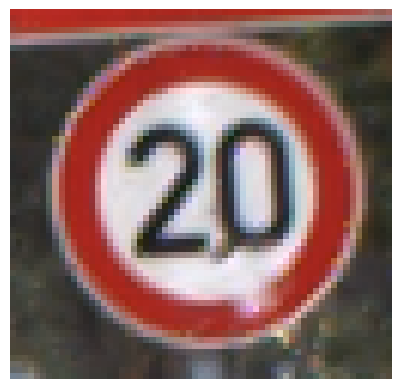

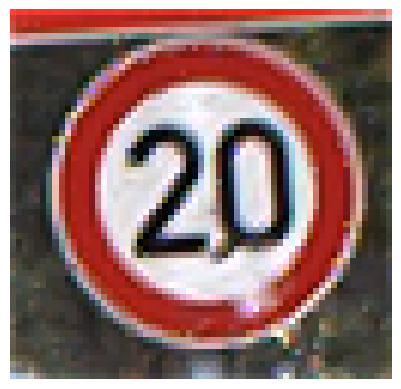

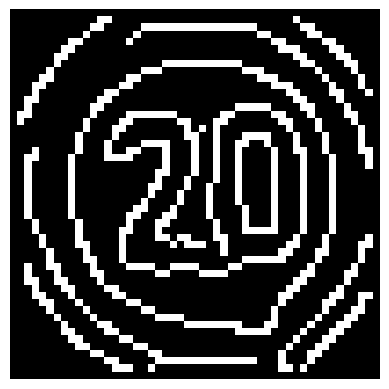

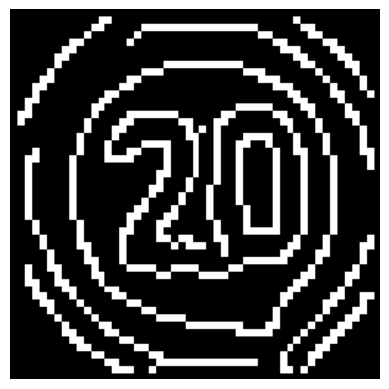

{'corner_count': np.int64(422),
 'circularity': 0.6753262298106194,
 'aspect_ratio': 1.0,
 'extent': np.float64(0.2166501114123869),
 'average_hue': np.float64(99.99303482587065)}

In [46]:
path = 'Train/0/00000_00000_00022.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# Class 1

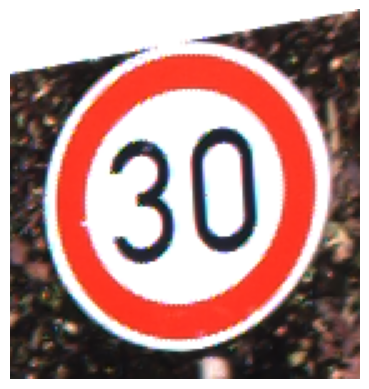

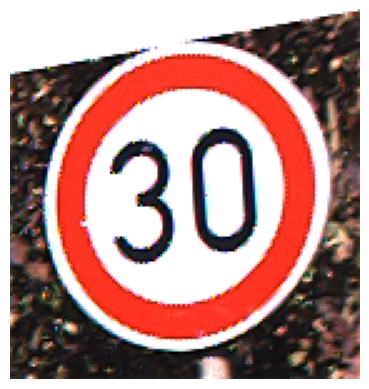

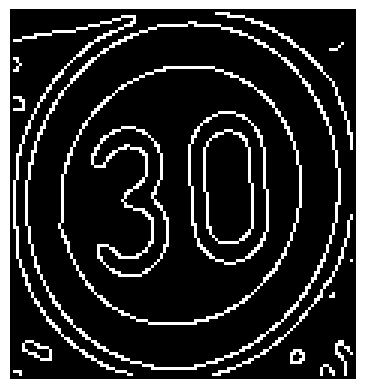

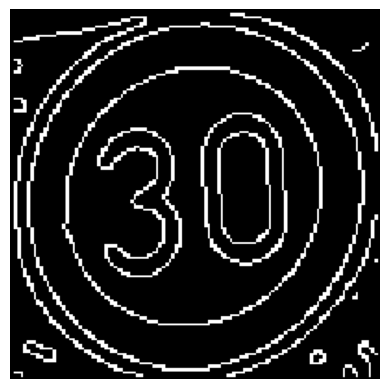

{'corner_count': np.int64(1888),
 'circularity': 0.7527634845343467,
 'aspect_ratio': 1.0,
 'extent': np.float64(0.11182973021721765),
 'average_hue': np.float64(77.47228088701162)}

In [58]:
path = 'Train/1/00001_00006_00029.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# Class 2

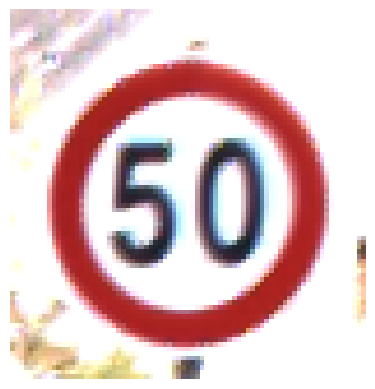

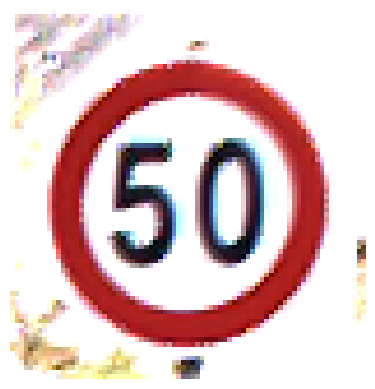

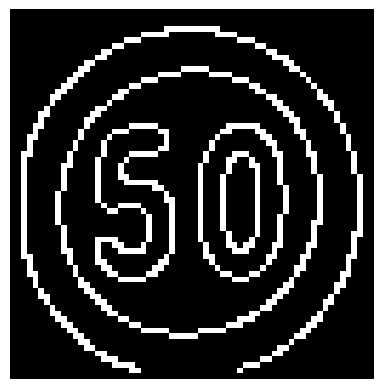

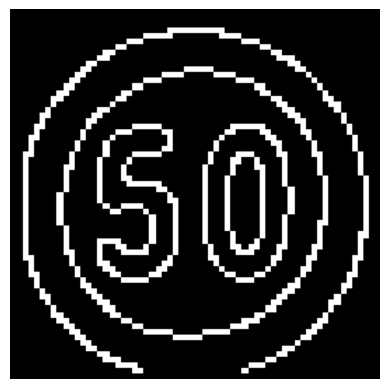

{'corner_count': np.int64(541),
 'circularity': 0.6746397316074492,
 'aspect_ratio': 1.0,
 'extent': np.float64(0.1547370528182104),
 'average_hue': np.float64(59.92343173431734)}

In [59]:
path = 'Train/2/00002_00022_00026.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# Class 3

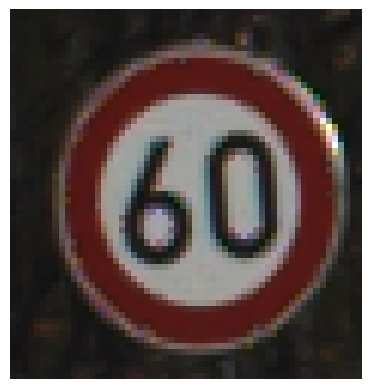

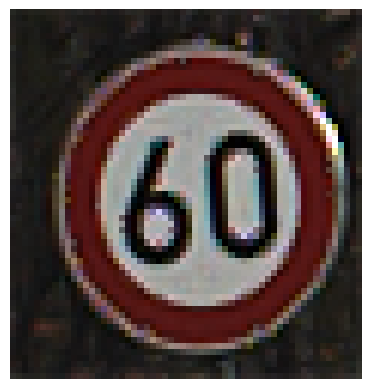

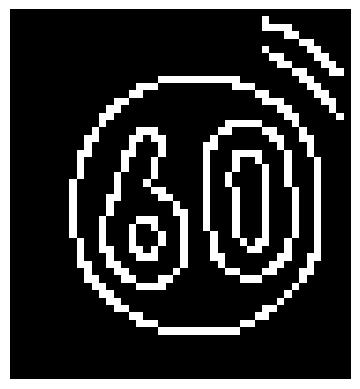

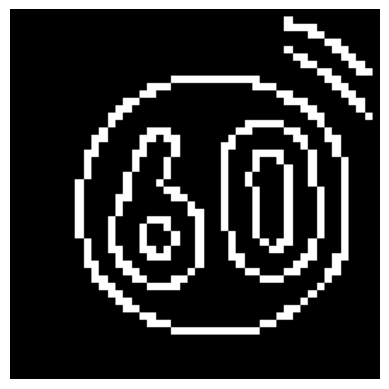

{'corner_count': np.int64(283),
 'circularity': 0.6930624875765742,
 'aspect_ratio': 0.936046511627907,
 'extent': np.float64(0.197891087678752),
 'average_hue': np.float64(100.75282714054927)}

In [60]:
path = 'Train/3/00003_00031_00024.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# Class 4

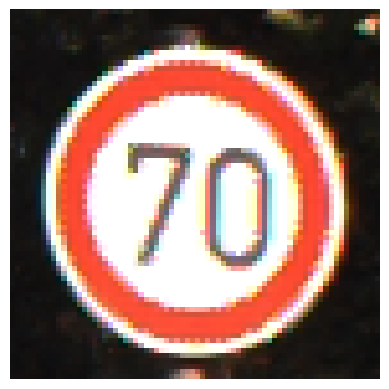

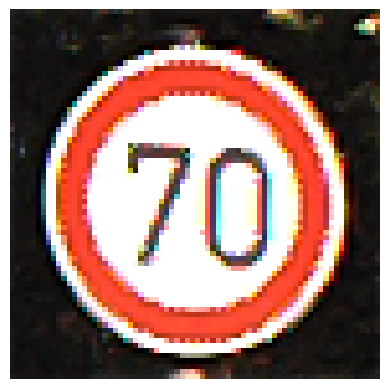

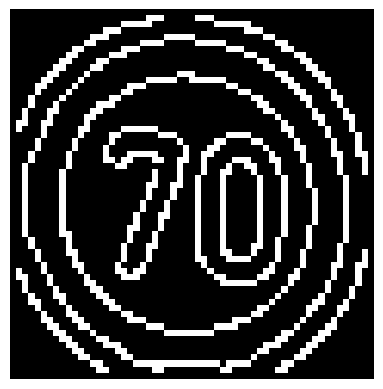

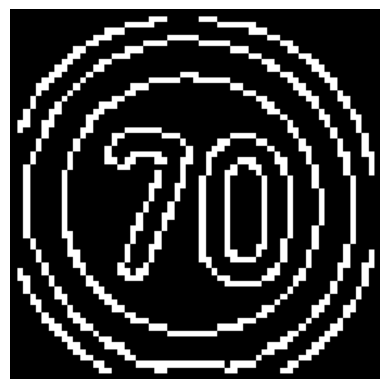

{'corner_count': np.int64(323),
 'circularity': 0.664533082046999,
 'aspect_ratio': 1.0,
 'extent': np.float64(0.19383070686461382),
 'average_hue': np.float64(90.17915590008613)}

In [61]:
path = 'Train/4/00004_00048_00025.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# Class 5

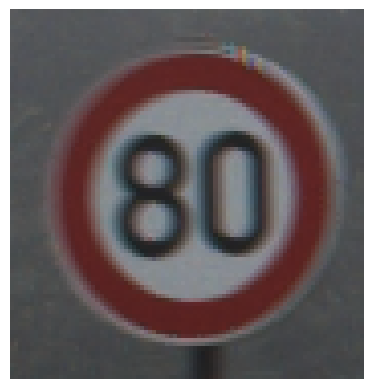

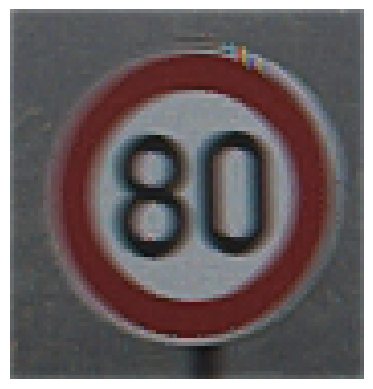

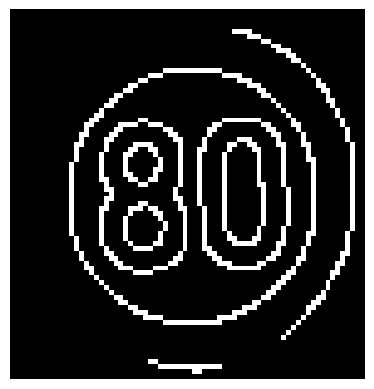

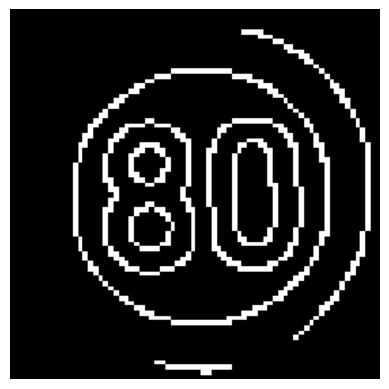

{'corner_count': np.int64(454),
 'circularity': 0.716554752556044,
 'aspect_ratio': 0.8609625668449198,
 'extent': np.float64(0.14199355631580696),
 'average_hue': np.float64(78.23600344530577)}

In [62]:
path = 'Train/5/00005_00042_00028.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# Class 6

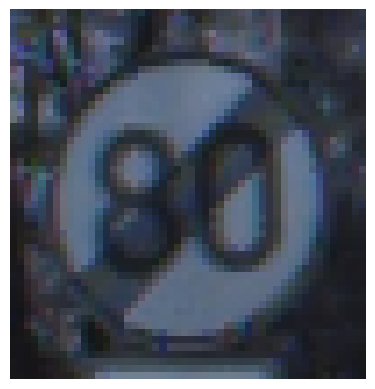

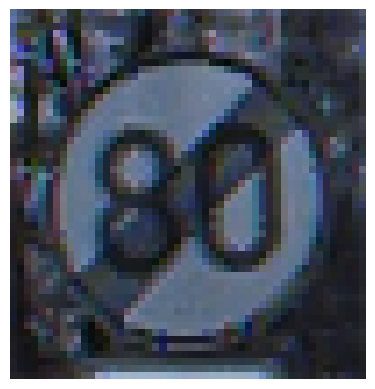

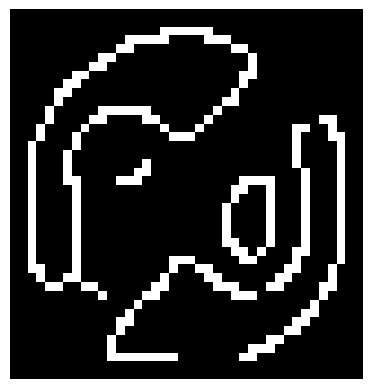

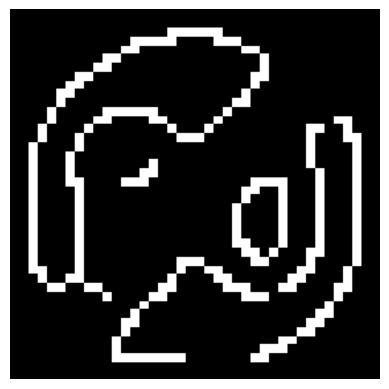

{'corner_count': np.int64(884),
 'circularity': 0.23485035430988185,
 'aspect_ratio': 0.994475138121547,
 'extent': np.float64(0.1671270718232044),
 'average_hue': np.float64(43.2350332594235)}

In [63]:
path = 'Train/6/00006_00003_00022.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Train_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
f

# g. Rule-Based Classification

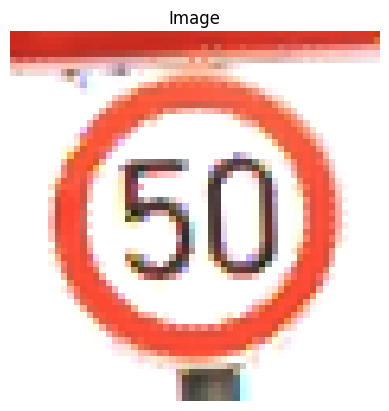

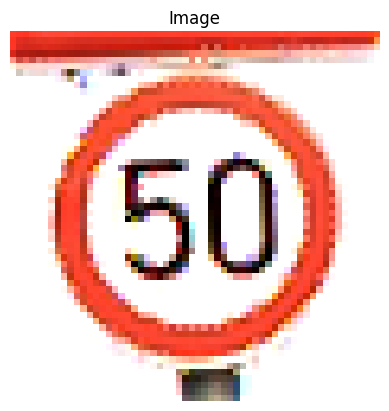

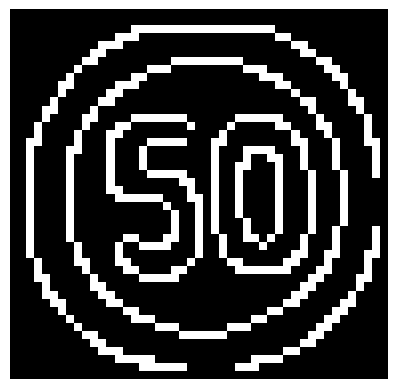

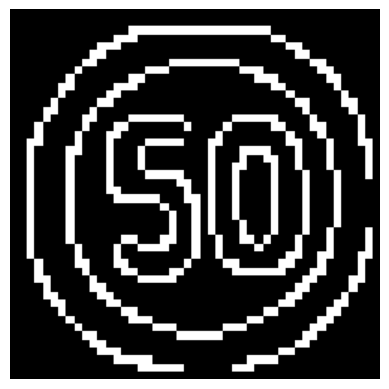

2

In [12]:
def predict_class(f):
    cc = f['corner_count']
    circ = f['circularity']
    ar = f['aspect_ratio']
    ext = f['extent']
    hue = f['average_hue']

    if cc > 1500:
        return 1
    elif circ < 0.3 and hue < 50:
        return 6
    elif cc < 300 and ar < 0.95:
        return 3
    elif ar < 0.9:
        return 5
    elif hue > 95 and ext > 0.2:
        return 0
    elif hue < 65:
        return 2
    elif hue < 95:
        return 4
    else:
        return -1  # Unknown or ambiguous

path = 'Test/00124.png'
img = read_image(path)
show_image(img)
img = apply_unsharp_masking(img)
show_image(img)
train_df = pd.read_csv('Test_Cleaned1.csv')
image = canny_edge_detection(img, path, train_df, low_thresh=50, high_thresh=120)
def show(image):
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.show()
show(image)
image = geometric_normalization(image, rotation_angle=0)
show(image)
f = extract_features(img, image)
predict_class(f)

# 3. Evaluation Procedure

In [13]:
# Evaluation Function
def evaluate_model(test_csv_path='Test_Cleaned1.csv', test_folder='Test'):
    test_df = pd.read_csv(test_csv_path)
    results = []

    for idx, row in test_df.iterrows():
        path = row['Path']
        full_path = os.path.join(path)
        img = read_image(full_path)
        sharpened = apply_unsharp_masking(img)
        edges = canny_edge_detection(sharpened, path, test_df)
        normalized = geometric_normalization(edges)
        features = extract_features(sharpened, normalized)
        pred = predict_class(features)
        gt = row['ClassId']
        results.append((path, gt, pred))
        print(f"{path} => GT: {gt}, Pred: {pred}")

    # Save results.csv
    df_results = pd.DataFrame(results, columns=['filename', 'ground_truth', 'predicted'])
    df_results.to_csv("results.csv", index=False)

    # Confusion Matrix and Metrics
    num_classes = 7
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for _, gt, pred in results:
        if pred != -1:
            confusion_matrix[gt][pred] += 1

    # Class-wise precision, recall, accuracy
    class_metrics = []
    total_correct = np.trace(confusion_matrix)
    total_samples = np.sum(confusion_matrix)

    with open("metrics.txt", "w") as f:
        f.write(f"Overall Accuracy: {total_correct / total_samples:.4f}\n\n")
        for i in range(num_classes):
            TP = confusion_matrix[i][i]
            FP = np.sum(confusion_matrix[:, i]) - TP
            FN = np.sum(confusion_matrix[i, :]) - TP
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            class_acc = TP / np.sum(confusion_matrix[i]) if np.sum(confusion_matrix[i]) > 0 else 0
            f.write(f"Class {i} - Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {class_acc:.4f}\n")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Ground Truth')
    plt.colorbar()
    plt.xticks(np.arange(num_classes))
    plt.yticks(np.arange(num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(confusion_matrix[i][j]), ha='center', va='center', color='black')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    plt.close()

    print("✅ Evaluation complete. Files saved: results.csv, metrics.txt, confusion_matrix.png")
evaluate_model(test_csv_path='Test_Cleaned1.csv', test_folder='Test')

Test/00001.png => GT: 1, Pred: 4
Test/00014.png => GT: 4, Pred: 4
Test/00020.png => GT: 4, Pred: 6
Test/00023.png => GT: 3, Pred: 4
Test/00024.png => GT: 1, Pred: 4
Test/00030.png => GT: 5, Pred: -1
Test/00034.png => GT: 2, Pred: 4
Test/00036.png => GT: 3, Pred: 0
Test/00046.png => GT: 3, Pred: -1
Test/00056.png => GT: 5, Pred: 6
Test/00062.png => GT: 4, Pred: 4
Test/00067.png => GT: 2, Pred: 3
Test/00068.png => GT: 5, Pred: 4
Test/00074.png => GT: 5, Pred: -1
Test/00076.png => GT: 1, Pred: 5
Test/00086.png => GT: 3, Pred: 4
Test/00090.png => GT: 3, Pred: 6
Test/00091.png => GT: 1, Pred: 0
Test/00092.png => GT: 2, Pred: 2
Test/00096.png => GT: 3, Pred: 6
Test/00100.png => GT: 1, Pred: 4
Test/00102.png => GT: 5, Pred: 6
Test/00105.png => GT: 4, Pred: 5
Test/00109.png => GT: 4, Pred: 6
Test/00110.png => GT: 1, Pred: 0
Test/00115.png => GT: 3, Pred: 4
Test/00118.png => GT: 1, Pred: -1
Test/00122.png => GT: 1, Pred: 4
Test/00124.png => GT: 2, Pred: 2
Test/00128.png => GT: 1, Pred: 5
Test/0

# The End
---